# Altair Sandbox

https://altair-viz.github.io/getting_started/overview.html


In [2]:
import altair as alt

# remove when running on Colab or JupyterLab
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [6]:
from vega_datasets import data
cars = data.cars()
cars

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01
5,10.0,8,429.0,198.0,15.0,ford galaxie 500,USA,4341,1970-01-01
6,9.0,8,454.0,220.0,14.0,chevrolet impala,USA,4354,1970-01-01
7,8.5,8,440.0,215.0,14.0,plymouth fury iii,USA,4312,1970-01-01
8,10.0,8,455.0,225.0,14.0,pontiac catalina,USA,4425,1970-01-01
9,8.5,8,390.0,190.0,15.0,amc ambassador dpl,USA,3850,1970-01-01


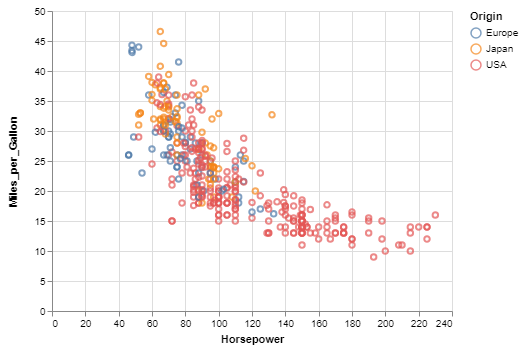

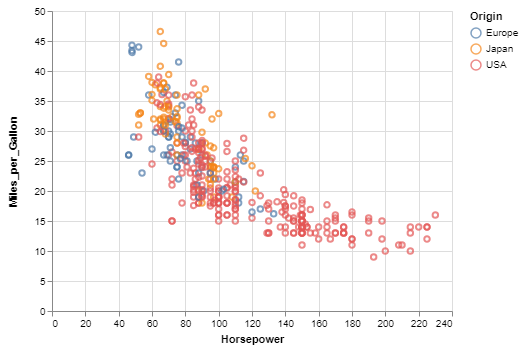

In [10]:
# interactive allows for zoom and pan
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

In [23]:
# Choose one of the two following data sets, the larger one gives better results, but might clutter the visualization depending on resolution

!curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-1500.csv
# !curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/scipy/data/insurance-customers-300.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
 27 26935   27  7434    0     0   3605      0  0:00:07  0:00:02  0:00:05  3605
100 26935  100 26935    0     0  12961      0  0:00:02  0:00:02 --:--:-- 12961


In [25]:
import pandas as pd
# customers = pd.read_csv('./insurance-customers-300.csv', sep=';')
customers = pd.read_csv('./insurance-customers-1500.csv', sep=';')

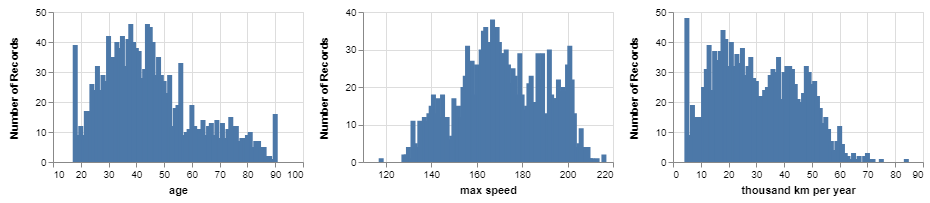

In [26]:
import altair as alt

brush = alt.selection(type='interval', encodings=['x'], resolve='intersect', empty='none')

# Define the base chart, with the common parts of the
# background and highlights
base = alt.Chart().mark_bar().encode(
    x=alt.X(alt.repeat('column'), type='quantitative'),
    y='count()'
).properties(
    width=250,
    height=150
)

# blue background with selection
background = base.properties(
    selection=brush
)

# yellow highlights on the transformed data
highlight = base.encode(
    color=alt.value('goldenrod')
).transform_filter(
    brush
)

# layer the two charts & repeat
alt.layer(
    background, highlight,
    data=customers
).repeat(
    column=["age", "max speed", "thousand km per year"]
)

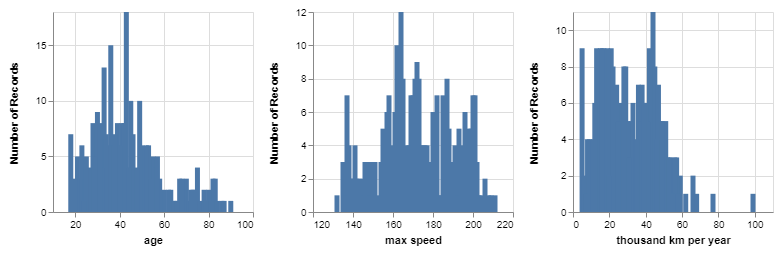

In [18]:
# https://beta.observablehq.com/@djcordhose/vega-lite
# https://altair-viz.github.io/user_guide/selections.html
# https://altair-viz.github.io/gallery/interactive_layered_crossfilter.html

brush = alt.selection_interval(encodings=['x'], resolve='intersect')

age = alt.Chart(customers).mark_bar().encode(
        x='age',
#         x=alt.X('age', bin=True),
        y='count()',
#         color=alt.condition(brush, alt.value('green'), alt.value('lightgray'))
#         color=alt.condition(brush, 'count()', alt.value('lightgray'))
).transform_filter(brush).properties(
    selection=brush
)
speed = alt.Chart(customers).mark_bar().encode(
        x='max speed',
        y='count()',
#         color=alt.condition(brush, 'count()', alt.value('lightgray'))
).properties(
    selection=brush
)
distance = alt.Chart(customers).mark_bar().encode(
        x='thousand km per year',
        y='count()',
#         color=alt.condition(brush, 'count()', alt.value('lightgray'))
).add_selection(brush)

age.properties(width=200, height=200) | speed.properties(width=200, height=200) | distance.properties(width=200, height=200)